In [1131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid',color_codes=True)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import lasso_path
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from scipy.stats import zscore

In [1132]:
df=pd.read_csv('cubic_zirconia.csv')

In [1133]:
df.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,13484.000000,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [1138]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [1139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [1140]:
df.shape

(26967, 11)

In [1141]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [1142]:
for i in df.columns:
    print('column name   :'+ i.upper()+'......'+str(df[i].nunique()))
 
    print(df[i].value_counts().sort_values())
    print('\n')

column name   :CARAT......257
3.24       1
4.00       1
2.41       1
2.59       1
2.60       1
        ... 
0.32     950
0.70     959
1.01    1111
0.31    1118
0.30    1331
Name: carat, Length: 257, dtype: int64


column name   :CUT......5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


column name   :COLOR......7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


column name   :CLARITY......8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64


column name   :DEPTH......169
70.8       1
55.0       1
72.2       1
72.9       1
69.5       1
        ... 
62.2     977
61.8    1012
62.1    1016
61.9    1091
62.0    1131
Name: depth, Length: 169, dtype: int64


column name   :TABLE......112
61.5       1
61.8       1
62.6       1
64.3       1
58.7       1
        ... 
55.0    3136
59.0    3302
5

In [1143]:
for i in df.columns:
    print(i)
    print(sorted(df[i].unique()))

carat
[0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.

In [1144]:
df[df.x==0]


,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [1145]:
df[df.y==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [1146]:
df[df.z==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [1149]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(26933, 10)

In [1150]:
df.duplicated().sum()

0

In [1151]:
df['depth'].unique().sum()

nan

In [1152]:
df.fillna(df['depth'].median(),inplace =True)#data distribution is normal

In [1153]:
df.drop(index=df[df.z==0].index,inplace=True)

In [1154]:
df.shape

(26925, 10)

In [1103]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [1104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [1105]:
#model without treating outliner

In [1106]:
X1=df.drop('price',axis=1)
y1=df[['price']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30 , random_state=1)

In [1107]:
data_train1 = pd.concat([X_train, y_train], axis=1)
data_test1=pd.concat([X_test,y_test],axis=1)
data_test1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
11971,1.51,4,5,2,63.0,59.0,7.26,7.31,4.59,8758
3294,1.02,3,3,2,60.8,58.0,6.50,6.46,3.94,4718
25427,2.05,3,0,3,60.0,58.0,8.31,8.23,4.96,12891
709,1.71,4,2,4,61.9,61.0,7.61,7.67,4.73,17685
8010,1.50,1,4,5,63.9,59.0,7.25,7.18,4.61,8165


In [1108]:

expr= 'price ~ carat + cut + color + clarity+depth+table+x+y+z'
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train1).fit()
lm1.params

Intercept    16407.717621
carat        11412.999078
cut             46.728101
color         -276.236407
clarity        289.276835
depth         -143.284380
table          -99.831428
x            -1106.496217
y               21.199103
z             -362.804752
dtype: float64

In [1109]:
print('Without treating outliner')
print(lm1.summary())

Without treating outliner
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.581e+04
Date:                Sun, 08 May 2022   Prob (F-statistic):               0.00
Time:                        18:11:10   Log-Likelihood:            -1.5828e+05
No. Observations:               18344   AIC:                         3.166e+05
Df Residuals:                   18334   BIC:                         3.167e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.641e+04   11

carat




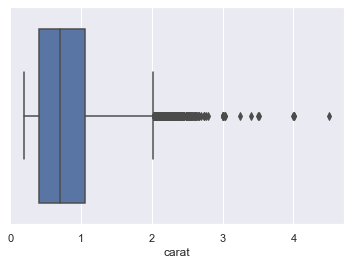

depth




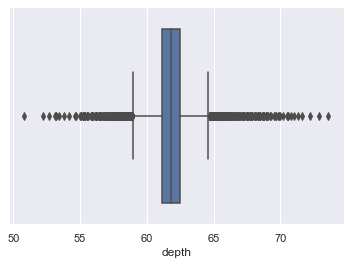

table




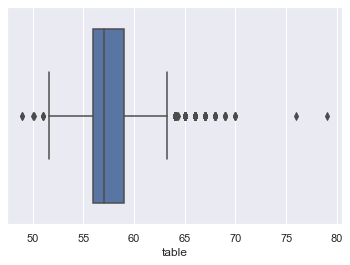

x




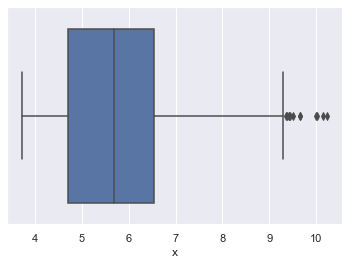

y




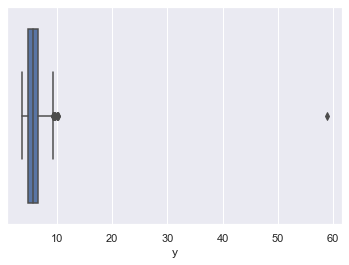

z




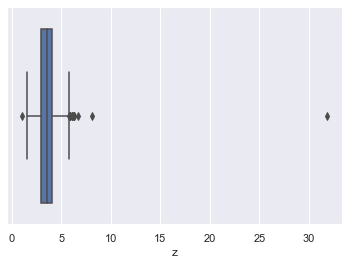

price




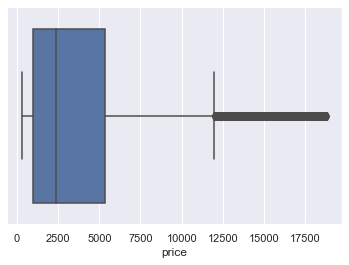

In [1110]:
df1=df.select_dtypes(exclude='object')
for i in df1:
    print(i)
    print('\n')
    sns.boxplot(x=df[i],data=df1)
    plt.show()

In [1205]:
def treat_outliner (col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    upper=q3 + (1.5*iqr)
    lower=q1 - (1.5*iqr)
    return upper,lower
for col in df.columns:
    if df[col].dtype != 'object':
        up,lr=treat_outliner(df[col])
        df[col]=np.where(df[col]>up,up,df[col])
        df[col]=np.where(df[col]<lr,lr,df[col])
        

carat




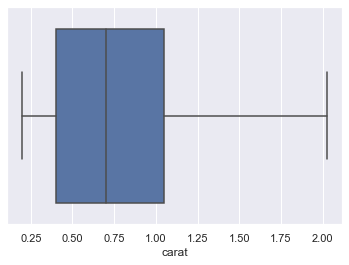

cut




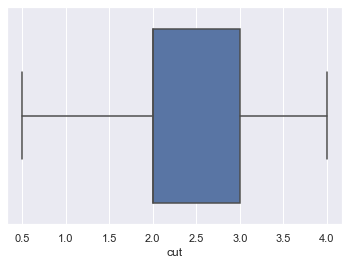

color




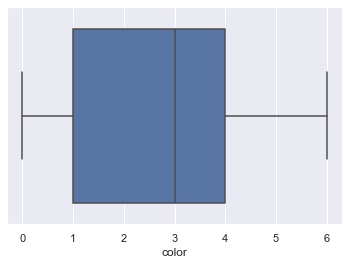

clarity




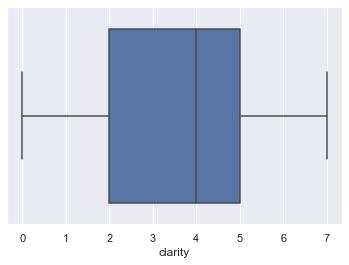

depth




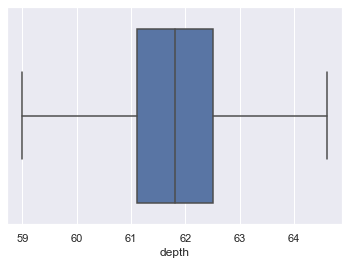

table




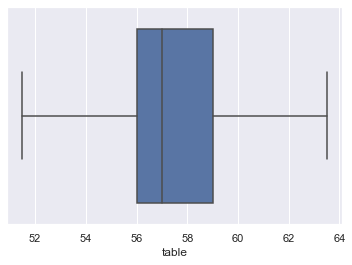

x




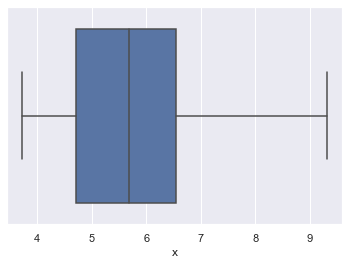

y




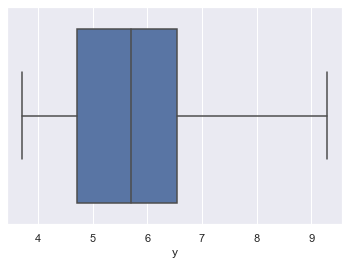

z




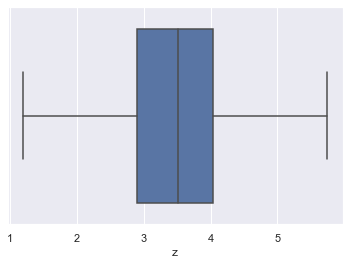

price




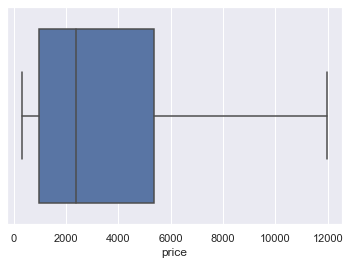

In [1206]:
df1=df.select_dtypes(exclude='object')
for i in df1:
    print(i)
    print('\n')
    sns.boxplot(x=df[i],data=df1)
    plt.show()

In [1207]:
print('cut','\n',df.cut.value_counts())
print('color','\n',df.color.value_counts())
print('clarity','\n',df.clarity.value_counts())

cut 
 2.0    10805
3.0     6880
4.0     6027
1.0     2434
0.5      779
Name: cut, dtype: int64
color 
 3.0    5650
1.0    4916
2.0    4722
4.0    4091
0.0    3341
5.0    2765
6.0    1440
Name: color, dtype: int64
clarity 
 2.0    6564
5.0    6092
3.0    4561
4.0    4086
7.0    2530
6.0    1839
1.0     891
0.0     362
Name: clarity, dtype: int64


In [1208]:
labelencoder=LabelEncoder()


In [1209]:
for i in df.columns:
    if df[i].dtype== 'object':
        df[i]=labelencoder.fit_transform(df[i])


In [1210]:
print('cut','\n',df.cut.value_counts())
print('color','\n',df.color.value_counts())
print('clarity','\n',df.clarity.value_counts())
    

cut 
 2.0    10805
3.0     6880
4.0     6027
1.0     2434
0.5      779
Name: cut, dtype: int64
color 
 3.0    5650
1.0    4916
2.0    4722
4.0    4091
0.0    3341
5.0    2765
6.0    1440
Name: color, dtype: int64
clarity 
 2.0    6564
5.0    6092
3.0    4561
4.0    4086
7.0    2530
6.0    1839
1.0     891
0.0     362
Name: clarity, dtype: int64


<AxesSubplot:>

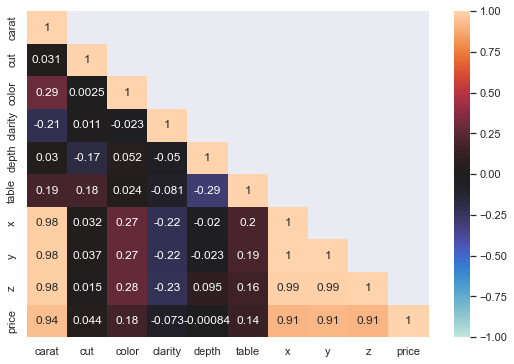

In [1211]:
plt.figure(figsize=(9,6))
corr=df.corr()
sns.heatmap(data=corr,annot=True,mask=np.triu(df.corr(),+1),center=0,vmax=1,vmin=-1)

<Figure size 72x72 with 0 Axes>

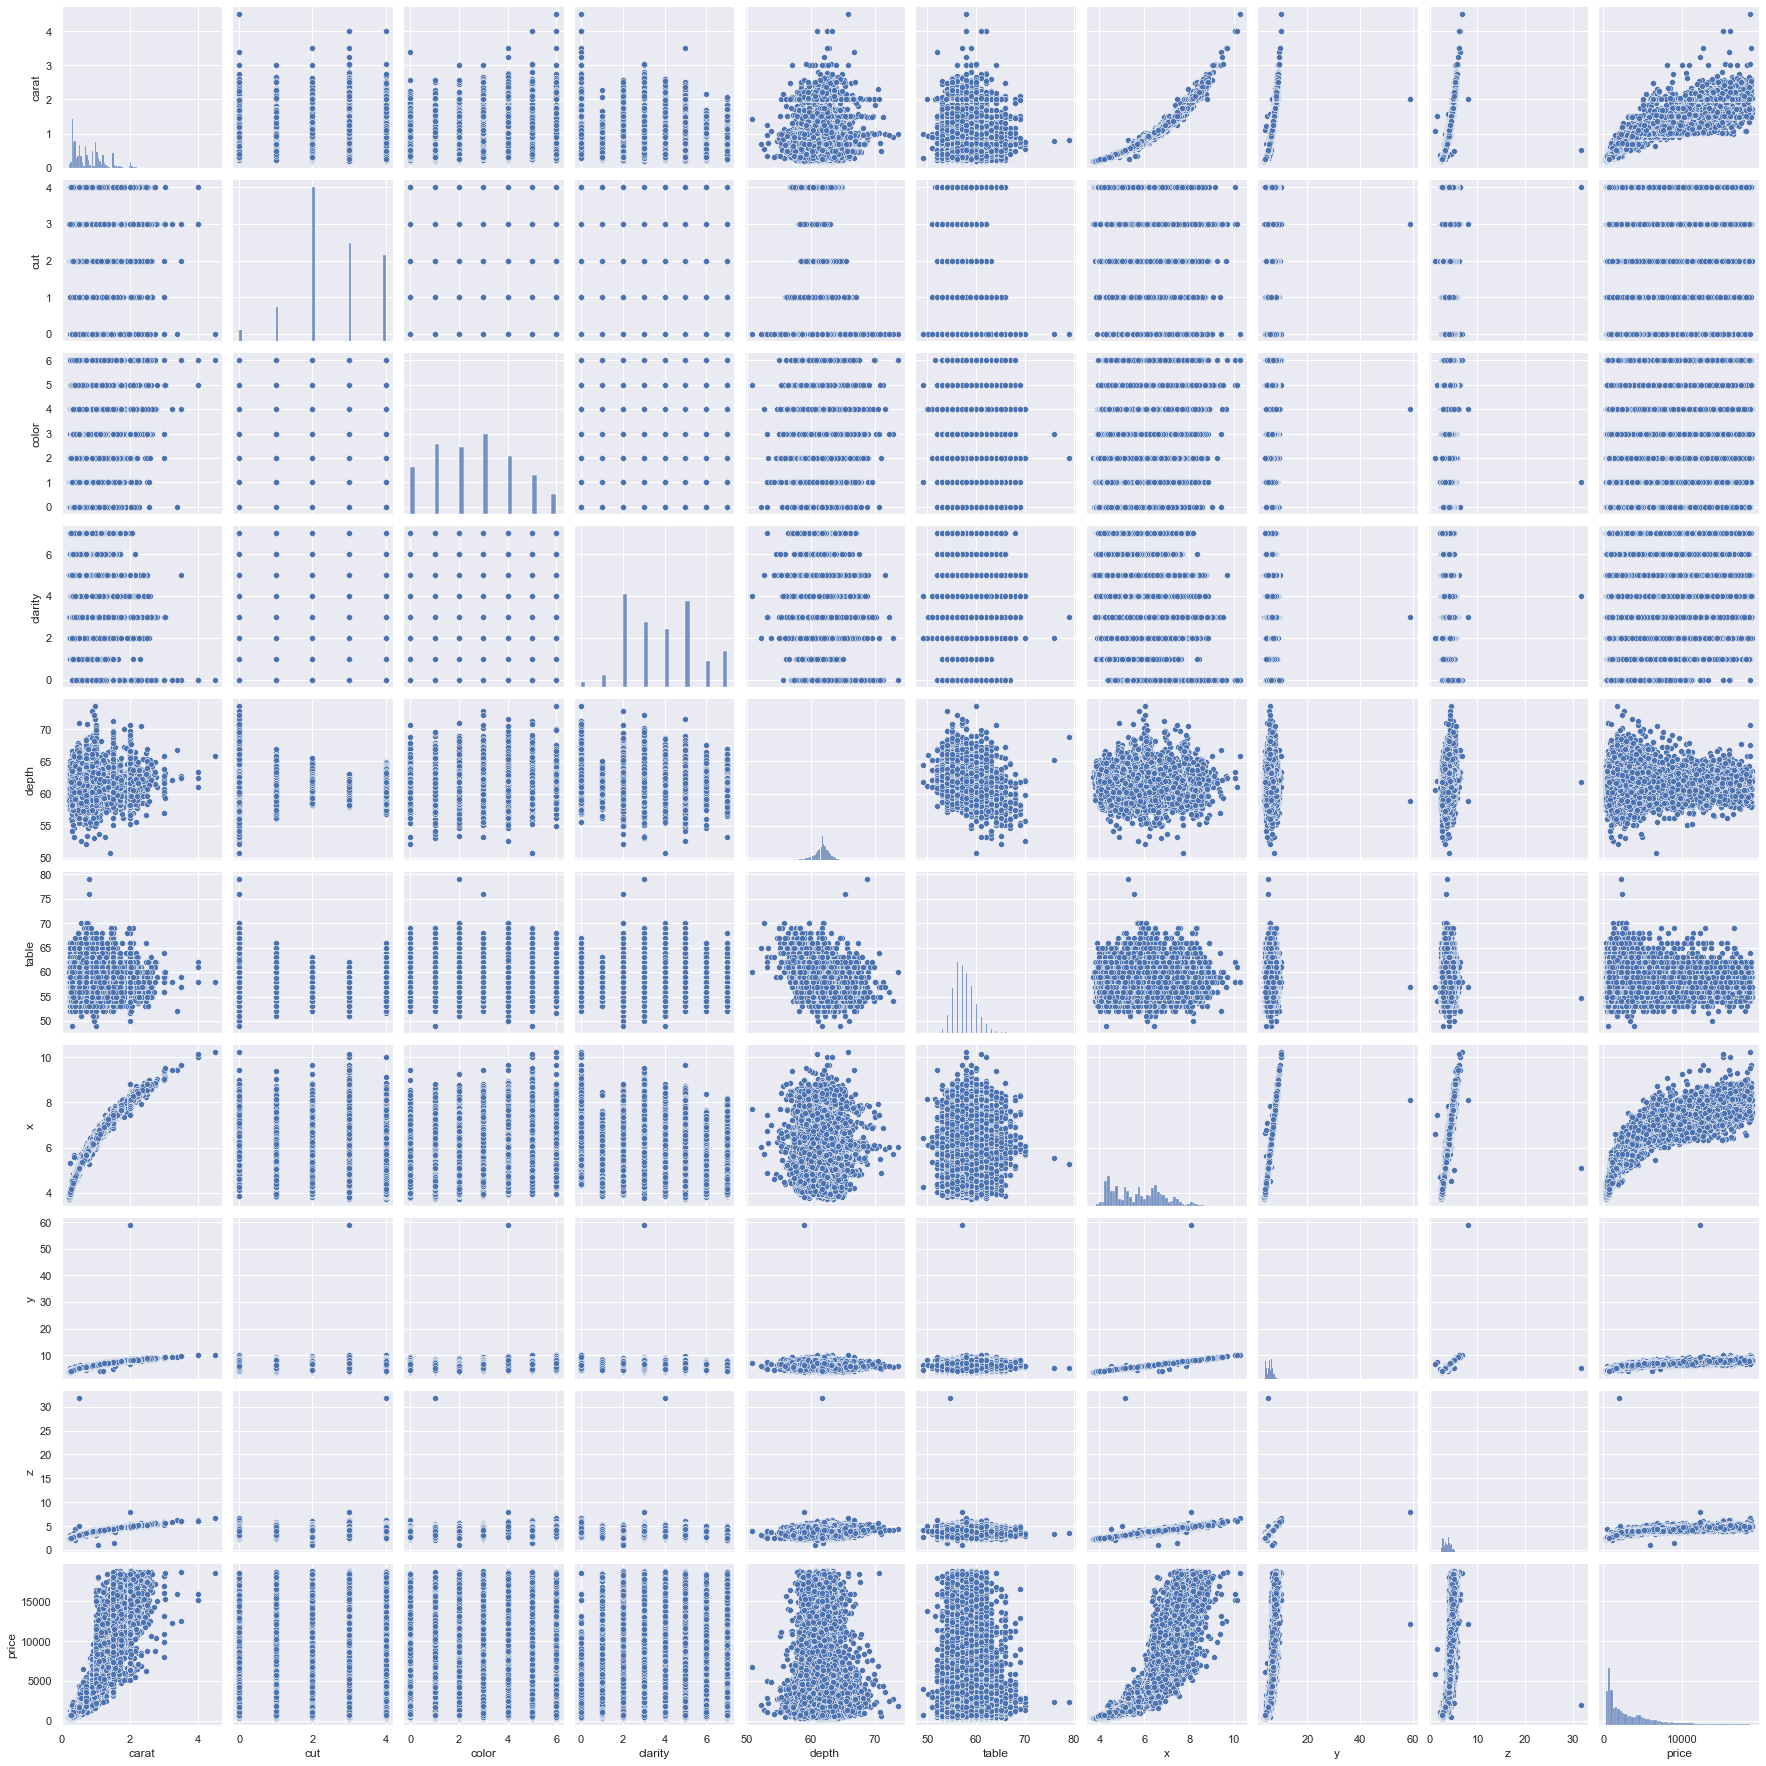

In [1185]:
plt.figure(figsize=(1,1))
sns.pairplot(data=df)

In [1212]:
X=df.drop('price',axis=1)
y=df[['price']]

In [1213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [1214]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26925 entries, 0 to 26924
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   depth   26925 non-null  float64
 1   table   26925 non-null  float64
 2   x       26925 non-null  float64
 3   y       26925 non-null  float64
 4   z       26925 non-null  float64
dtypes: float64(5)
memory usage: 1.0 MB


In [1215]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [1216]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[0][idx]))

The coefficient for carat is 9295.22423191269
The coefficient for cut is 32.693542242249464
The coefficient for color is -227.5734025204339
The coefficient for clarity is 251.06687522779714
The coefficient for depth is -46.11446711620289
The coefficient for table is -75.81106441834163
The coefficient for x is -2041.9740176228847
The coefficient for y is 1970.7735832051303
The coefficient for z is -1040.7073386879795


In [1217]:
intercept =lr.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is [7196.13026446]


In [1218]:
# R square on training data
lr.score(X_train, y_train)

0.9089899718659059

In [1219]:
# R square on testing data
lr.score(X_test, y_test)

0.9116484135962084

In [1220]:
predicted_train=lr.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1043.2785900749352

In [1197]:
predicted_test=lr.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1340.8868319807666

In [1198]:
print('Equation:')
for idx, col_name in enumerate(X_train.columns):
    print("{}{} + ".format(round(lr.coef_[0][idx],2),col_name),end=(''))
print(round(intercept[0],2))

Equation:
11401.31carat + 49.39cut + -277.12color + 289.85clarity + -161.35depth + -97.95table + -1284.89x + 0.57y + -33.05z + 17392.11


In [1221]:
rig=Ridge(alpha=1)
rig.fit(X_train,y_train)
print(rig.coef_)

[[ 9215.5567478     33.34072933  -227.14026212   251.45080042
    -46.96853446   -75.95059451 -1956.66458884  1897.05783497
  -1008.05857191]]


In [1222]:
las=Lasso(alpha=5)
las.fit(X_train,y_train)
print(las.coef_)

[8216.95674009   40.89716936 -220.56367612  256.65927568  -96.51885089
  -78.58235795 -286.8214021     0.           -0.        ]


In [1223]:
print(rig.score(X_train,y_train))
print(rig.score(X_test,y_test))

0.9089852079463748
0.9116911020311061


In [1224]:
print(las.score(X_train,y_train))
print(las.score(X_test,y_test))

0.9074620256837604
0.910403010359502


In [738]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_test.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
11971,1.510,4,5,2,63.0,59.0,7.26,7.31,4.59,8758.0
3294,1.020,3,3,2,60.8,58.0,6.50,6.46,3.94,4718.0
25427,2.025,3,0,3,60.0,58.0,8.31,8.23,4.96,11965.0
709,1.710,4,2,4,61.9,61.0,7.61,7.67,4.73,11965.0
8010,1.500,1,4,5,63.9,59.0,7.25,7.18,4.61,8165.0


In [739]:
expr= 'price ~ carat + cut + color + clarity+depth+table+x+y+z'

In [740]:
expr= 'price ~ carat + cut + color + clarity+depth+table+x+y+z'
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept    7136.437798
carat        9292.670632
cut            39.483190
color        -227.580273
clarity       250.964075
depth         -45.218194
table         -76.087305
x           -2019.712383
y            1945.261445
z           -1033.799665
dtype: float64

In [741]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.092e+04
Date:                Sun, 08 May 2022   Prob (F-statistic):               0.00
Time:                        12:04:06   Log-Likelihood:            -1.5773e+05
No. Observations:               18847   AIC:                         3.155e+05
Df Residuals:                   18837   BIC:                         3.156e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7136.4378    851.368      8.382      0.0

In [742]:
#The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [743]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [744]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1043.017493263133

In [745]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

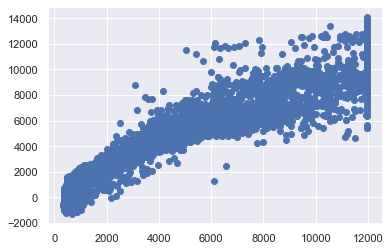

In [746]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [1300]:
dfn=pd.read_csv('Holiday_Package.csv')

In [1301]:
dfn.drop('Unnamed: 0',axis=1,inplace=True)
dfn

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes


In [1302]:
dfn.duplicated().sum()

0

In [1303]:
dfn.describe(include='all')

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [1304]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [1305]:
dfn.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [1306]:
dfn.isna().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [1307]:
for i in dfn.columns:
    if dfn[i].dtype !='object':
        print(i,dfn[i].nunique())

Salary 864
age 43
educ 20
no_young_children 4
no_older_children 7


Salary


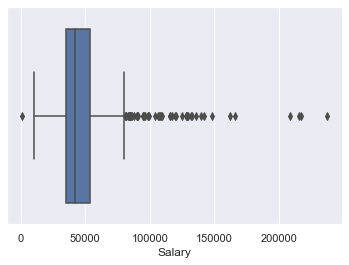

age


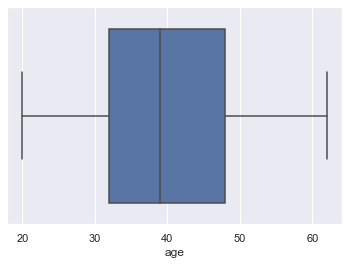

educ


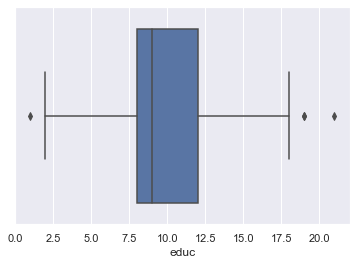

no_young_children


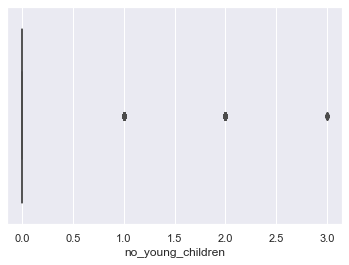

no_older_children


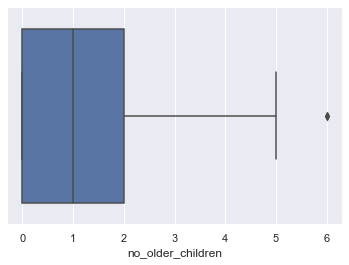

In [1308]:
for i in dfn.select_dtypes(exclude='object'):
    print(i)
    sns.boxplot(x=dfn[i])
    plt.show()
    

In [1314]:
#treating ouliers 
q1=dfn['Salary'].quantile(.25)
q3=dfn['Salary'].quantile(.75)
iqr=q3-q1
upper=q3 + (1.5*iqr)
lower=q1 - (1.5*iqr)
dfn['Salary']=np.where(dfn['Salary']>upper,upper,dfn['Salary'])
dfn['Salary']=np.where(dfn['Salary']<lower,lower,dfn['Salary'])

In [1315]:
dfn

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30,8,1,1,no
1,yes,37207.0,45,8,0,1,no
2,no,58022.0,46,9,0,0,no
3,no,66503.0,31,11,2,0,no
4,no,66734.0,44,12,0,2,no
...,...,...,...,...,...,...,...
867,no,40030.0,24,4,2,1,yes
868,yes,32137.0,48,8,0,0,yes
869,no,25178.0,24,6,2,0,yes
870,yes,55958.0,41,10,0,1,yes


Salary


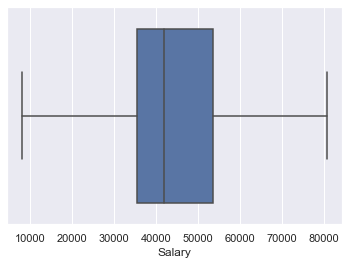

age


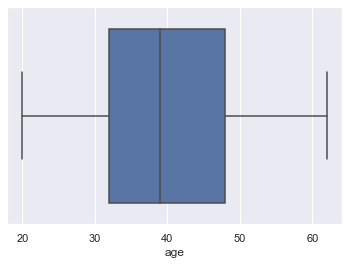

educ


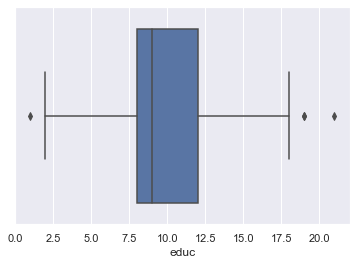

no_young_children


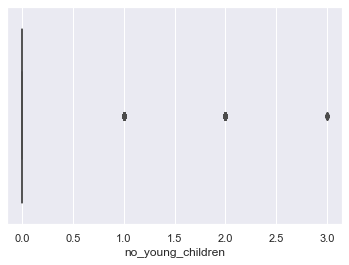

no_older_children


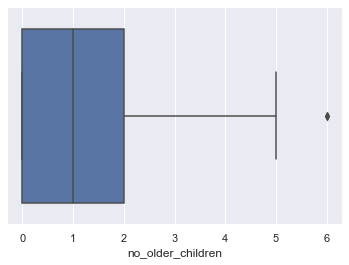

In [1316]:
for i in dfn.select_dtypes(exclude='object'):
    print(i)
    sns.boxplot(x=dfn[i])
    plt.show()

<AxesSubplot:>

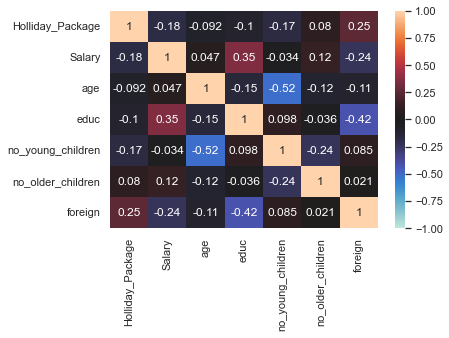

In [1320]:
corr=dfn.corr()
sns.heatmap(data=corr,annot=True,vmax=1,vmin=-1,center=0)

<Figure size 216x216 with 0 Axes>

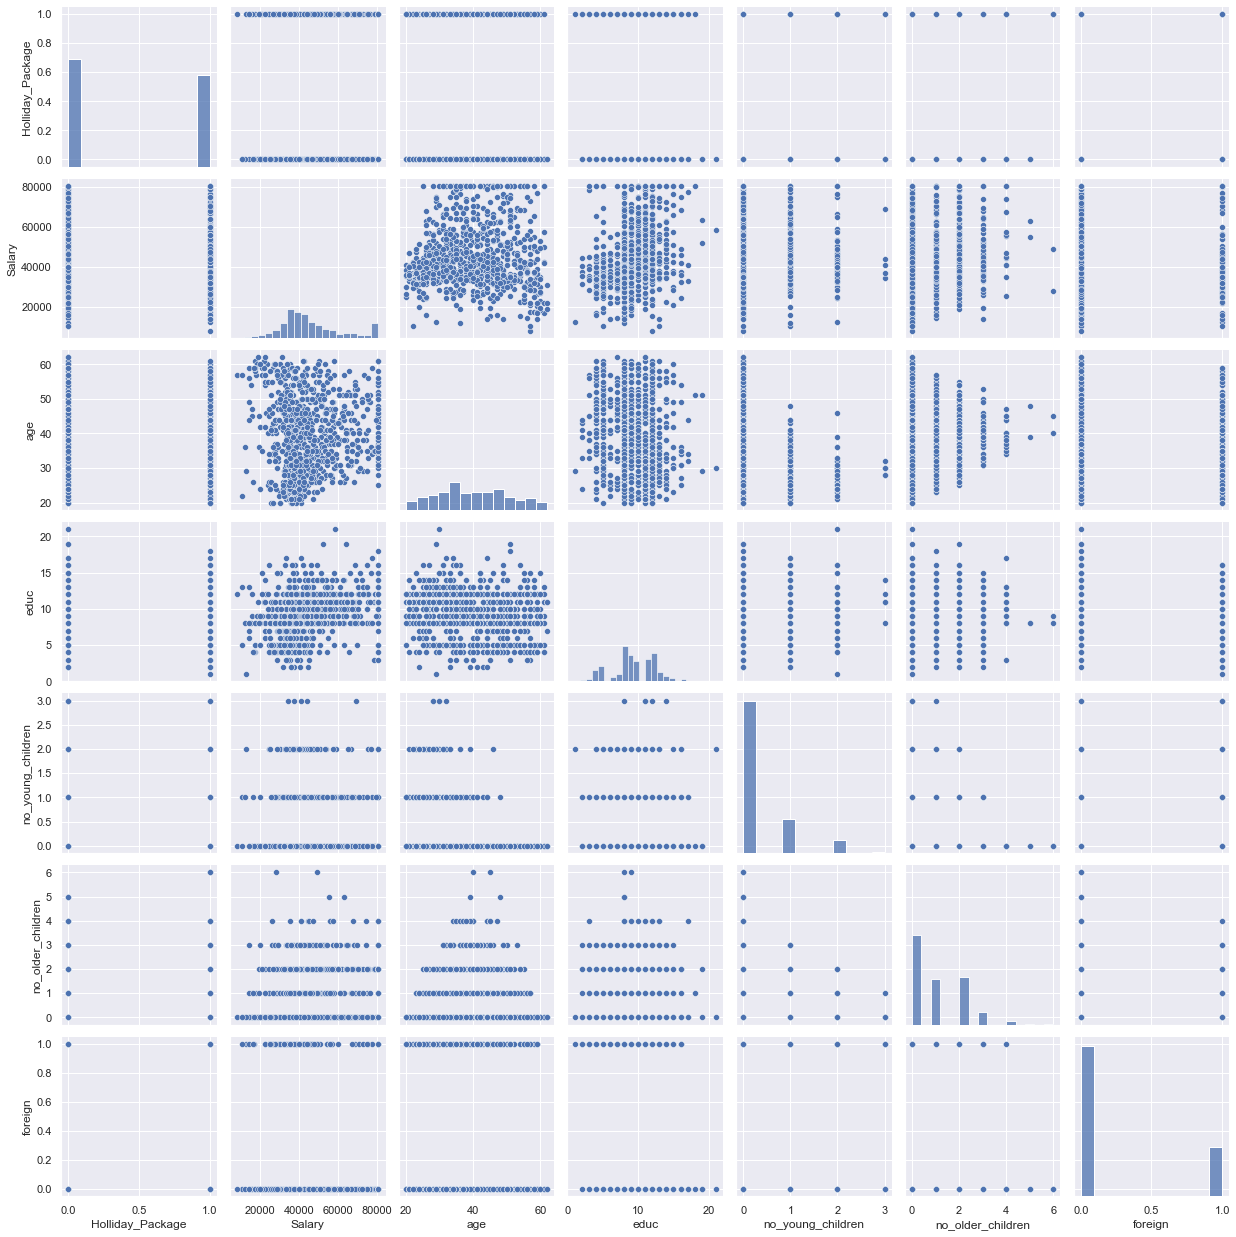

In [1323]:
plt.figure(figsize=(3,3))
sns.pairplot(data=dfn)

In [1317]:
dfn.foreign=pd.Categorical(dfn['foreign']).codes
dfn.Holliday_Package=pd.Categorical(dfn['Holliday_Package']).codes


In [1337]:
X=dfn.drop('Holliday_Package',axis=1)
y=dfn['Holliday_Package']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [1338]:
y_train

502    0
729    1
604    0
246    0
494    1
      ..
715    1
767    1
72     0
235    0
37     0
Name: Holliday_Package, Length: 610, dtype: int8

In [1344]:
model = LogisticRegression(solver='newton-cg',max_iter=100000,penalty='none',verbose=True,n_jobs=3)
model.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: Line

LogisticRegression(max_iter=100000, n_jobs=3, penalty='none',
                   solver='newton-cg', verbose=True)

In [1355]:
#predicting on training and test data
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [1356]:
ytest_predict_prob=model.predict_proba(X_test)
ytrain_precdict_prob=model.predict_proba(X_train)

In [1357]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6754098360655738

AUC: 0.742


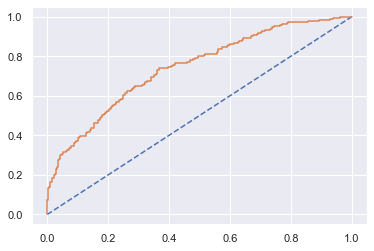

In [1358]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [1359]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6374045801526718

AUC: 0.742


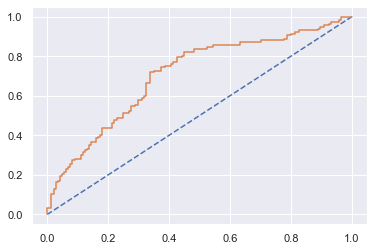

In [1360]:
#predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


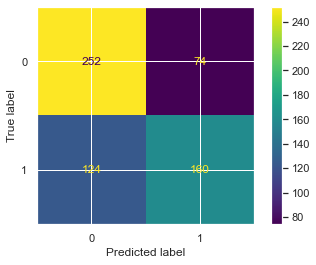

In [1361]:
plot_confusion_matrix(model,X_train,y_train);

In [1362]:
confusion_matrix(y_train, ytrain_predict)

array([[252,  74],
       [124, 160]])

In [1363]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



In [1364]:
confusion_matrix(y_test, ytest_predict)

array([[102,  43],
       [ 52,  65]])

In [1365]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [1377]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.00001,0.00001]}

In [1378]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [1379]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')



In [1380]:
grid_search.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter 

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [1e-05, 1e-05]},
             scoring='f1')

In [1381]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag', tol=1e-05)


In [1382]:
best_model = grid_search.best_estimator_

In [1383]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [1384]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)


              precision    recall  f1-score   support

           0       0.53      1.00      0.70       326
           1       0.00      0.00      0.00       284

    accuracy                           0.53       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.53      0.37       610
 



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

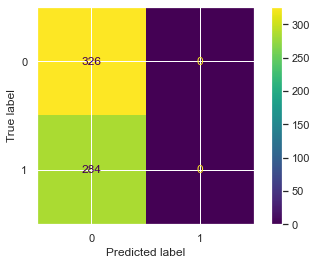

In [1385]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.53      1.00      0.70       326
           1       0.00      0.00      0.00       284

    accuracy                           0.53       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.53      0.37       610
 



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

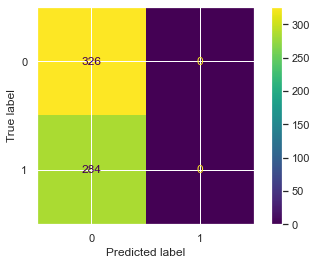

In [1386]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

In [1439]:
###LDA MODEL
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [1440]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train,y_train)

In [1441]:
pred_class_train = model1.predict(X_train)

pred_class_test = model1.predict(X_test)

In [1442]:
model1.score(X_train, y_train)


0.6754098360655738

In [1443]:
model1.score(X_test, y_test)

0.6412213740458015

In [1444]:
ytest_predict=model1.predict_proba(X_test)

In [1445]:
ytrain_predict=model1.predict_proba(X_train)

In [1446]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.61       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262
 



In [1447]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.739
AUC for the Test Data: 0.703


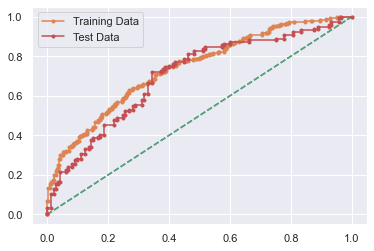

In [1448]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')

In [1434]:
ytrain_predict=model1.predict(X_train)
ytest_predict=model1.predict(X_test)

In [1433]:
confusion_matrix(y_train, ytrain_predict)

array([[254,  72],
       [126, 158]])

In [1437]:
confusion_matrix(y_test, ytest_predict)

array([[103,  42],
       [ 52,  65]])

0.1 

Accuracy Score 0.4836
F1 Score 0.6425 

Confusion Matrix
0.2 

Accuracy Score 0.5328
F1 Score 0.6611 

Confusion Matrix
0.3 

Accuracy Score 0.6
F1 Score 0.6755 

Confusion Matrix
0.4 

Accuracy Score 0.6656
F1 Score 0.6699 

Confusion Matrix
0.5 

Accuracy Score 0.6754
F1 Score 0.6148 

Confusion Matrix
0.6 

Accuracy Score 0.659
F1 Score 0.5378 

Confusion Matrix
0.7 

Accuracy Score 0.6492
F1 Score 0.4596 

Confusion Matrix
0.8 

Accuracy Score 0.6033
F1 Score 0.2754 

Confusion Matrix
0.9 

Accuracy Score 0.5443
F1 Score 0.0414 

Confusion Matrix


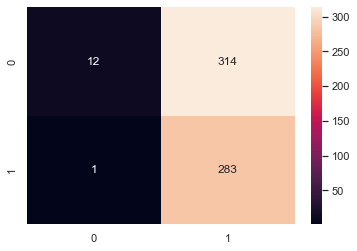

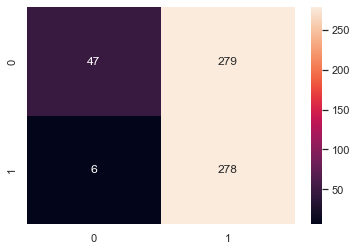

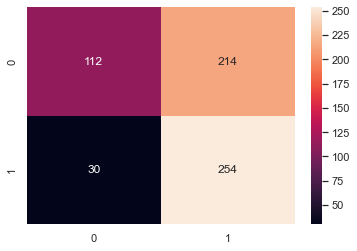

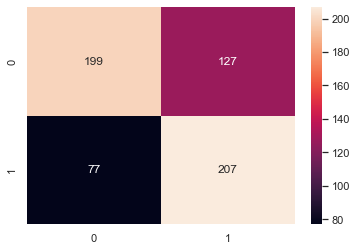

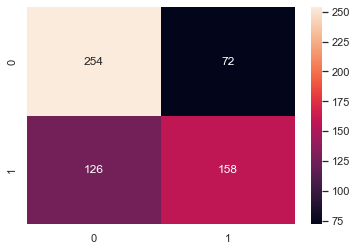

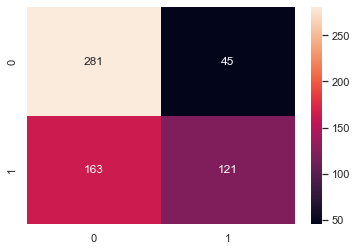

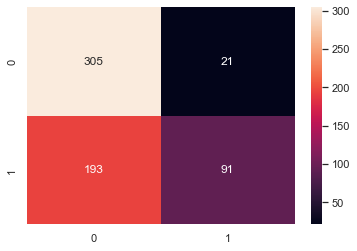

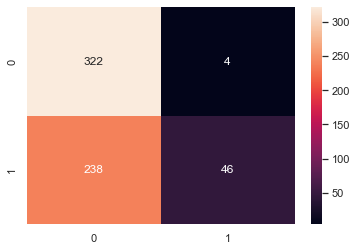

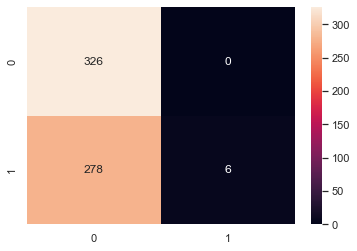

In [1449]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'

In [1457]:


data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.5:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

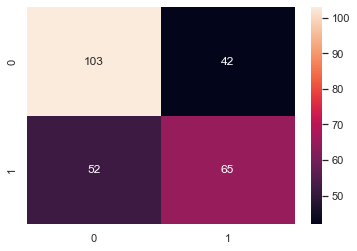

In [1459]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g');